<a href="https://colab.research.google.com/github/oyyarko/deeplearning_rnn/blob/master/airline-passenger-lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
!curl 'https://storage.googleapis.com/kaggle-data-sets/1057/1913/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1586068874&Signature=ioRwl1fGZdjOI%2BNHEAFxlxlZYrvfGAl9v7sZRqJsLkM8y%2FMzPitNP7bVfR3Wy9owPrx3F5ZCtKWkNNxog8ms9j4qhk9qhC7rOX%2BfynAq%2Bn6fQnXYpODITZK0G%2FrUMbT3smuecxybYbGr6TwFllCTAhKRMM%2FynuMg8RDS2ahVEQEfN2weDjD%2Fpl5FwXnZsp7l2nYlCToLkZC7%2F6PTM6SqZrWnp4yKDfVwj1naSEsnDlFm%2FKPO1t8P6tOZQaNZAiZsOMgqUrI%2FyZSy75apc3KYtj%2F1LRB5%2BgMaBet6YaecYLnj9I8QIaE7NPAw1nFlSdD22pRniTzP73AriuWqfdpWog%3D%3D&response-content-disposition=attachment%3B+filename%3Dair-passengers.zip' -H 'User-Agent: Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:74.0) Gecko/20100101 Firefox/74.0' -H 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8' -H 'Accept-Language: en-US,en;q=0.5' --compressed -H 'Referer: https://www.kaggle.com/' -o data.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   764  100   764    0     0   6112      0 --:--:-- --:--:-- --:--:--  6112


In [0]:
from zipfile import ZipFile

with ZipFile('data.zip', 'r') as f:
    f.extractall() 

In [0]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [99]:
dataset = pd.read_csv('AirPassengers.csv')
dataset = dataset['#Passengers']
dataset = np.array(dataset).reshape(-1, 1)
dataset

array([[112],
       [118],
       [132],
       [129],
       [121],
       [135],
       [148],
       [148],
       [136],
       [119],
       [104],
       [118],
       [115],
       [126],
       [141],
       [135],
       [125],
       [149],
       [170],
       [170],
       [158],
       [133],
       [114],
       [140],
       [145],
       [150],
       [178],
       [163],
       [172],
       [178],
       [199],
       [199],
       [184],
       [162],
       [146],
       [166],
       [171],
       [180],
       [193],
       [181],
       [183],
       [218],
       [230],
       [242],
       [209],
       [191],
       [172],
       [194],
       [196],
       [196],
       [236],
       [235],
       [229],
       [243],
       [264],
       [272],
       [237],
       [211],
       [180],
       [201],
       [204],
       [188],
       [235],
       [227],
       [234],
       [264],
       [302],
       [293],
       [259],
       [229],
       [203],
      

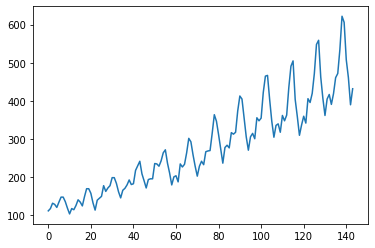

In [100]:
plt.plot(dataset)

In [101]:
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)
dataset

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [0]:
train_size = 100
test_size = 44

In [103]:
train = dataset[0:train_size, :]
test = dataset[train_size : 144, :]
train.shape

(100, 1)

In [104]:
test.shape

(44, 1)

In [0]:
def get_data(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i+look_back, 0])
    return np.array(dataX), np.array(dataY)

In [0]:
look_back = 1
X_train, y_train = get_data(train, look_back)

In [107]:
X_train.shape

(98, 1)

In [108]:
X_train

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [109]:
y_train

array([0.02702703, 0.05405405, 0.04826255, 0.03281853, 0.05984556,
       0.08494208, 0.08494208, 0.06177606, 0.02895753, 0.        ,
       0.02702703, 0.02123552, 0.04247104, 0.07142857, 0.05984556,
       0.04054054, 0.08687259, 0.12741313, 0.12741313, 0.1042471 ,
       0.05598456, 0.01930502, 0.06949807, 0.07915058, 0.08880309,
       0.14285714, 0.11389961, 0.13127413, 0.14285714, 0.18339768,
       0.18339768, 0.15444015, 0.11196911, 0.08108108, 0.11969112,
       0.12934363, 0.14671815, 0.17181467, 0.14864865, 0.15250965,
       0.22007722, 0.24324324, 0.26640927, 0.2027027 , 0.16795367,
       0.13127413, 0.17374517, 0.17760618, 0.17760618, 0.25482625,
       0.25289575, 0.24131274, 0.26833977, 0.30888031, 0.32432432,
       0.25675676, 0.20656371, 0.14671815, 0.18725869, 0.19305019,
       0.16216216, 0.25289575, 0.23745174, 0.25096525, 0.30888031,
       0.38223938, 0.36486486, 0.2992278 , 0.24131274, 0.19111969,
       0.24131274, 0.26640927, 0.24903475, 0.31467181, 0.31853

In [0]:
X_test, y_test = get_data(test, look_back)

In [111]:
X_test.shape

(42, 1)

In [0]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [113]:
X_train.shape

(98, 1, 1)

In [0]:
model = Sequential()
model.add(LSTM(5, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [115]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 5)                 140       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 6         
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


In [116]:
model.fit(X_train, y_train, epochs=50, batch_size=1)

Epoch 1/50
98/98 [==============================] - 0s 2ms/step - loss: 0.0417
Epoch 2/50
98/98 [==============================] - 0s 1ms/step - loss: 0.0192
Epoch 3/50
98/98 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 4/50
98/98 [==============================] - 0s 2ms/step - loss: 0.0139
Epoch 5/50
98/98 [==============================] - 0s 2ms/step - loss: 0.0128
Epoch 6/50
98/98 [==============================] - 0s 1ms/step - loss: 0.0116
Epoch 7/50
98/98 [==============================] - 0s 1ms/step - loss: 0.0103
Epoch 8/50
98/98 [==============================] - 0s 1ms/step - loss: 0.0092
Epoch 9/50
98/98 [==============================] - 0s 1ms/step - loss: 0.0082
Epoch 10/50
98/98 [==============================] - 0s 2ms/step - loss: 0.0070
Epoch 11/50
98/98 [==============================] - 0s 2ms/step - loss: 0.0060
Epoch 12/50
98/98 [==============================] - 0s 2ms/step - loss: 0.0051
Epoch 13/50
98/98 [==============================

In [0]:
y_pred = model.predict(X_test)

In [0]:
y_pred = scaler.inverse_transform(y_pred)

In [119]:
scaler.scale_

array([0.0019305])

In [0]:
y_test = np.array(y_test)
y_test = y_test.reshape(-1, 1)
y_test = scaler.inverse_transform(y_test)

In [121]:
y_test

array([[422.],
       [465.],
       [467.],
       [404.],
       [347.],
       [305.],
       [336.],
       [340.],
       [318.],
       [362.],
       [348.],
       [363.],
       [435.],
       [491.],
       [505.],
       [404.],
       [359.],
       [310.],
       [337.],
       [360.],
       [342.],
       [406.],
       [396.],
       [420.],
       [472.],
       [548.],
       [559.],
       [463.],
       [407.],
       [362.],
       [405.],
       [417.],
       [391.],
       [419.],
       [461.],
       [472.],
       [535.],
       [622.],
       [606.],
       [508.],
       [461.],
       [390.]])

In [122]:
y_pred

array([[353.22388],
       [413.29446],
       [449.5667 ],
       [451.20694],
       [397.55817],
       [345.79846],
       [306.1179 ],
       [335.51328],
       [339.26303],
       [318.51212],
       [359.6811 ],
       [346.72922],
       [360.6004 ],
       [424.46066],
       [470.5566 ],
       [481.5584 ],
       [397.55817],
       [356.91837],
       [310.8953 ],
       [336.45175],
       [357.84006],
       [341.13382],
       [399.3221 ],
       [390.46494],
       [411.56168],
       [455.28885],
       [514.02997],
       [522.01886],
       [447.92233],
       [400.2026 ],
       [359.6811 ],
       [398.44064],
       [408.95496],
       [386.00156],
       [410.6937 ],
       [446.27362],
       [455.28885],
       [504.42233],
       [565.3466 ],
       [554.72687],
       [483.8884 ],
       [446.27362]], dtype=float32)

In [123]:
scaler.scale_

array([0.0019305])

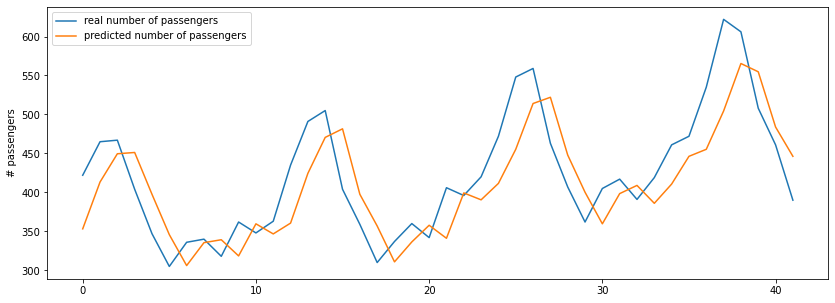

In [124]:
plt.figure(figsize=(14,5))
plt.plot(y_test, label = 'real number of passengers')
plt.plot(y_pred, label = 'predicted number of passengers')
plt.ylabel('# passengers')
plt.legend()
plt.show()